In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data_path = "C:/Users/shree/OneDrive/Desktop/ML assignment/global Hunger index.csv"
df = pd.read_csv(data_path, encoding='ISO-8859-1')

In [3]:
df.replace('<5', 4.9, inplace=True)

In [4]:
columns_to_convert = ['2000', '2007', '2014', '2022', 'Absolute change', 'Percent change']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [6]:
df['RankCategory'] = pd.cut(df['Rank in 2022'], bins=[0, 50, 100, float('inf')], labels=['low', 'medium', 'high'])

In [7]:
X = df[['2000', '2007', '2014', '2022']]  
y = df['RankCategory'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9615384615384616


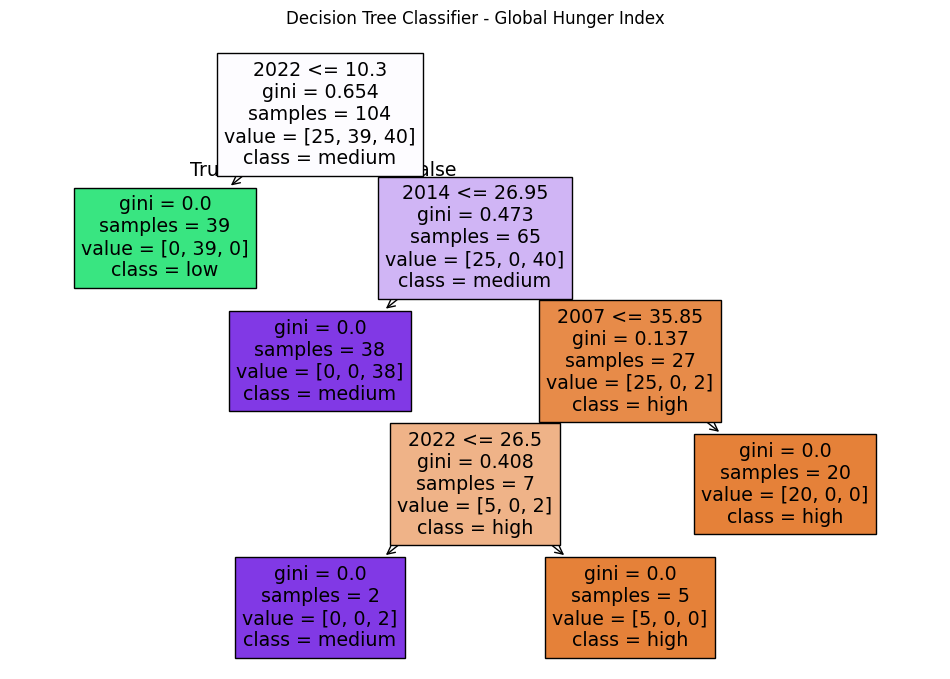

In [10]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=sorted(y.unique()))
plt.title("Decision Tree Classifier - Global Hunger Index\n")
plt.show()